### Replacing the rare label by most frequent label

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# % matplotlib inline

from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# let's load the house price dataset from Kaggle

data = pd.read_csv('/Users/nandrajog/Downloads/House-price.csv',low_memory=False)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# let's go ahead and divide dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split(data, data.SalePrice, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 81), (438, 81))

In [69]:
def train_rf(X_train, y_train, X_test, y_test, columns):
    # function to train the random forest
    # and test it on train and test sets
    
    rf = RandomForestRegressor(n_estimators=800, random_state=39)
    
    if type(columns)==str: # if we train using only 1 variable (pass a string instead of list in the "columns" argument of the function)
        rf.fit(X_train[columns].to_frame(), y_train.values)
        pred_train = rf.predict(X_train[columns].to_frame())
        pred_test = rf.predict(X_test[columns].to_frame())
        
    else: # if we train using multiple variables (pass a list in the argument "columns")
        rf.fit(X_train[columns], y_train.values)
        pred_train = rf.predict(X_train[columns])
        pred_test = rf.predict(X_test[columns])

        print('Train set')
        print('Random Forests mse: {}'.format(mean_squared_error(y_train, pred_train)))
        print('Test set')
        print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred_test)))

In [5]:
def labels_to_numbers(X_train, X_test, columns):
    # function to encode labels into numbers
    # each label will be assigned an ordinal number from 0 onwards
    
    for col in columns:
        labels_dict = {k:i for i, k in enumerate(X_train[col].unique(), 0)}
        X_train.loc[:, col] = X_train.loc[:, col].map(labels_dict )
        X_test.loc[:, col] = X_test.loc[:, col].map(labels_dict)

In [6]:
for col in X_train:
    if X_train[col].dtype =='object':
        if len(X_train[col].unique())>4:
            print(X_train.groupby(col)[col].count())
#             print("####### Percentage ########" )
#             print(X_train.groupby(col)[col].count()/np.float(len(data)))
            print()

MSZoning
C (all)      9
FV          38
RH          14
RL         819
RM         142
Name: MSZoning, dtype: int64

LotConfig
Corner     181
CulDSac     68
FR2         31
FR3          1
Inside     741
Name: LotConfig, dtype: int64

Neighborhood
Blmngtn     12
Blueste      2
BrDale      10
BrkSide     41
ClearCr     24
CollgCr    105
Crawfor     35
Edwards     71
Gilbert     55
IDOTRR      24
MeadowV     12
Mitchel     36
NAmes      151
NPkVill      7
NWAmes      51
NoRidge     30
NridgHt     51
OldTown     73
SWISU       18
Sawyer      61
SawyerW     45
Somerst     56
StoneBr     16
Timber      30
Veenker      6
Name: Neighborhood, dtype: int64

Condition1
Artery     26
Feedr      50
Norm      894
PosA        6
PosN       14
RRAe       10
RRAn       16
RRNe        2
RRNn        4
Name: Condition1, dtype: int64

Condition2
Artery       1
Feedr        4
Norm      1015
PosN         1
RRAe         1
Name: Condition2, dtype: int64

BldgType
1Fam      858
2fmCon     22
Duplex     33
Twnhs     

In [7]:
cols = ['MasVnrType', 'ExterQual', 'BsmtCond']
for col in cols:
    print(data.groupby(col)[col].count()/np.float(len(data)))
    print()

MasVnrType
BrkCmn     0.010274
BrkFace    0.304795
None       0.591781
Stone      0.087671
Name: MasVnrType, dtype: float64

ExterQual
Ex    0.035616
Fa    0.009589
Gd    0.334247
TA    0.620548
Name: ExterQual, dtype: float64

BsmtCond
Fa    0.030822
Gd    0.044521
Po    0.001370
TA    0.897945
Name: BsmtCond, dtype: float64



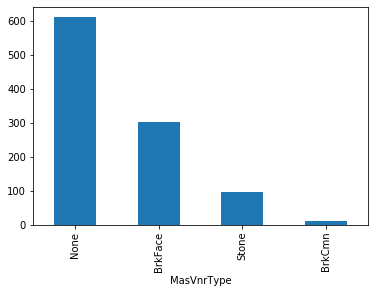

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train.groupby(['MasVnrType'])['MasVnrType'].count().sort_values(ascending=False).plot.bar()


In [9]:
for col in ['MasVnrType', 'ExterQual', 'BsmtCond']:
    print(col,":",X_train[col].isnull().sum())

MasVnrType : 5
ExterQual : 0
BsmtCond : 24


Two of the variables have missing data, so let's replace by the most frequent category 

In [10]:
def Impute_na(df_train,df_test,col):
    
    most_frequent = df_train[col].value_counts().index[0]
#     print("Most_frequent", most_frequent)
    df_train[col] = df_train[col].fillna(most_frequent)
    df_test[col] = df_test[col].fillna(most_frequent)

In [11]:
for col in (['MasVnrType', 'BsmtCond']):
    Impute_na(X_train,X_test,col)

/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


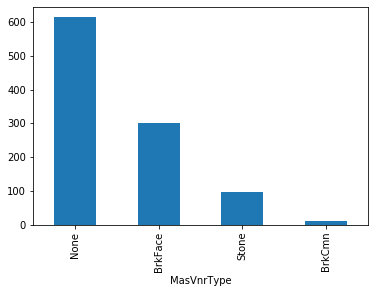

In [17]:
X_train.groupby(['MasVnrType'])['MasVnrType'].count().sort_values(ascending =False).plot.bar()

In [22]:
for col in ['MasVnrType', 'BsmtCond']:
#     impute_na(X_train, X_test, col)
    
    print(X_train[cols].isnull().sum())

MasVnrType    0
ExterQual     0
BsmtCond      0
dtype: int64
MasVnrType    0
ExterQual     0
BsmtCond      0
dtype: int64


In [31]:
# X_train.MasVnrType.index.values.min()

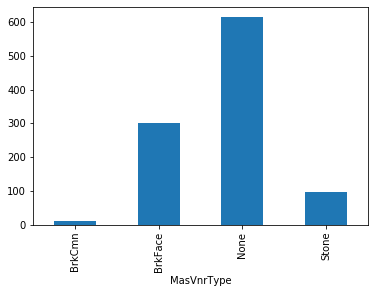

In [38]:
temp = X_train.groupby(['MasVnrType'])['MasVnrType'].count()
temp.plot.bar()

In [43]:
temp =temp/len(X_train)

In [56]:
temp.loc[temp<0.05].index[0]

'BrkCmn'

This plot shows that the Rare value is "BrkCmn"

In [51]:
x =temp.loc[temp<0.05].index[0]
x

'BrkCmn'

In [57]:
def rare_imputation(df_train, df_test, variable):
    
    # find the most frequent category
#     frequent_cat = X_train.groupby(variable)[variable].count().sort_values().tail(1).index.values[0]
    most_frequent = df_train[col].value_counts().index[0]
    # find rare labels
    temp = df_train.groupby([variable])[variable].count()/np.float(len(X_train))
    rare_cat = [x for x in temp.loc[temp<0.05].index.values]
    
    # create new variables, with Rare labels imputed
    
    # by the most frequent category
    X_train[variable+'_freq_imp'] = np.where(X_train[variable].isin(rare_cat), most_frequent, X_train[variable])
    X_test[variable+'_freq_imp'] = np.where(X_test[variable].isin(rare_cat), most_frequent, X_test[variable])
    
    # by adding a new label 'Rare'
    X_train[variable+'_rare_imp'] = np.where(X_train[variable].isin(rare_cat), 'Rare', X_train[variable])
    X_test[variable+'_rare_imp'] = np.where(X_test[variable].isin(rare_cat), 'Rare', X_test[variable])

In [60]:
rare_imputation(X_train,X_test,'MasVnrType')

/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

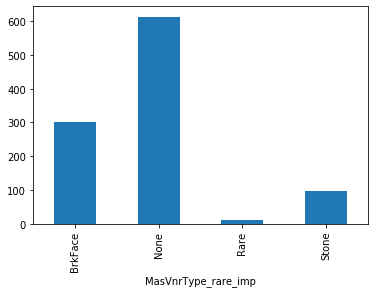

In [67]:
X_train.groupby(['MasVnrType_rare_imp'])['MasVnrType_rare_imp'].count().plot.bar()

In [71]:
labels_to_numbers(X_train, X_test, ['MasVnrType', 'MasVnrType_rare_imp', 'MasVnrType_freq_imp'])

# and then we build a random forest using the original distribution


/anaconda3/envs/C-vision/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [103]:
X_train['MasVnrType']

64      0
682     1
960     1
1384    1
1100    1
       ..
763     0
835     1
1216    1
559     0
684     0
Name: MasVnrType, Length: 1022, dtype: int64

In [104]:
 rf = RandomForestRegressor(n_estimators=800, random_state=39)

In [134]:
rf.fit(X_train.MasVnrType.to_frame(), y_train.values)
pred_train = rf.predict(X_train.MasVnrType.to_frame())
pred_test = rf.predict(X_test.MasVnrType.to_frame())

print('Train set')
print('Random Forests mse: {}'.format(mean_squared_error(y_train, pred_train)))
print('Test set')
print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred_test)))
        

Train set
Random Forests mse: 4879648935.038812
Test set
Random Forests mse: 5785517057.405808


In [135]:
rf.fit(X_train.MasVnrType_freq_imp.to_frame(), y_train.values)

pred_train = rf.predict(X_train.MasVnrType_freq_imp.to_frame())

pred_test = rf.predict(X_test.MasVnrType_freq_imp.to_frame())

print('Train set')
print('Random Forests mse: {}'.format(mean_squared_error(y_train, pred_train)))
print('Test set')
print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred_test)))

Train set
Random Forests mse: 4879648935.038812
Test set
Random Forests mse: 5785517057.405808


In [136]:
rf.fit(X_train.MasVnrType_rare_imp.to_frame(), y_train.values)

pred_train = rf.predict(X_train.MasVnrType_rare_imp.to_frame())

pred_test = rf.predict(X_test.MasVnrType_rare_imp.to_frame())

print('Train set')
print('Random Forests mse: {}'.format(mean_squared_error(y_train, pred_train)))
print('Test set')
print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred_test)))

Train set
Random Forests mse: 4879648935.038812
Test set
Random Forests mse: 5785517057.405808


Similary we can explore remianing varaible

In my opinion, engineering rare labels in variables with very few categories like the ones we worked in this notebook, seems unlikely to bring forward a boost in the performance of the algorithm. And this is because few categories are unlikely to bring so much noise.

However, if the number of categories increases, then it becomes more important to handle the rare labels.